This file is for the assignment 1 of Monte Carlo Method at University Paris Dauphine master 2 MASEF 

Author: Yu Xiang

Contact: shawnxiangyu@yahoo.com

In [72]:
%matplotlib inline
import numpy as np
from scipy import linalg
import time
import matplotlib.pyplot as plt
import math


# choose a large font size by default and use tex for math

fontsize = 12
params = {'axes.labelsize': fontsize + 2,
      'font.size': fontsize + 2,
      'legend.fontsize': fontsize + 2,
      'xtick.labelsize': fontsize,
      'ytick.labelsize': fontsize}
plt.rcParams.update(params)

### Exercise 1 Inverse Transform Method

$$ f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$$

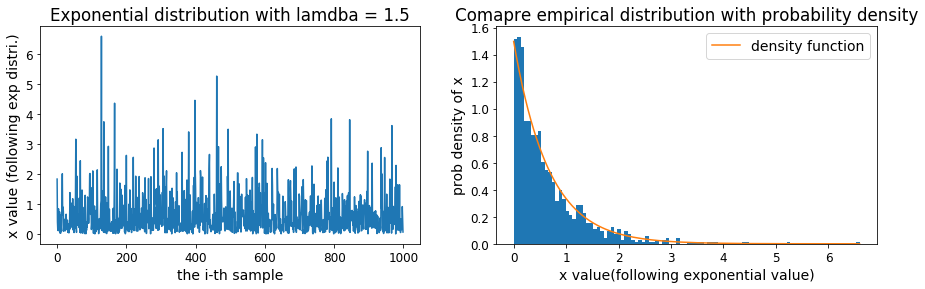

In [64]:
# 1 generate a large sample from exponential distribution

nr_samples = 1000
la = 1.5 # lambda value
index = np.arange(nr_samples)

uni_samples = np.random.rand(nr_samples)  # uni_samples return the cumulative probabilities value
exp_samples = - 1/ la * np.log(1- uni_samples)  # return the value following the exp distribution based on the cdf 

uni_samples.sort()
ord_exp_sps = - 1/la * np.log(1 - uni_samples) 
exp_fx = la * np.exp(-la * ord_exp_sps)

plt.figure(figsize=(15.0, 4.0))
plt.subplot(1, 2, 1)
plt.plot(index, exp_samples)
plt.xlabel('the i-th sample')
plt.ylabel('x value (following exp distri.)')
plt.title ('Exponential distribution with lamdba = ' + str(la))

plt.subplot(1, 2, 2)
plt.hist(exp_samples, bins=100, density=1)
plt.plot(ord_exp_sps, exp_fx, label='density function')
plt.legend()
plt.xlabel('x value(following exponential value)')
plt.ylabel('prob density of x')
plt.title('Compare empirical distribution with probability density')
plt.show()


### Exercise 2 Acceptance-Rejection Method

In [141]:
def indicator_func(x): 
    
    xid = np.logical_and(-1 < x, x <1)
    xindi = x.copy()
    xindi[xid] = 1
    xindi[~xid] = 0
    
    return xindi
    
def f(x): 
    xindi = indicator_func(x)
    fx = xindi.copy()
    xin = xindi == 1
    fx[xin] = 2 / math.pi * (1-x[xin] ** 2) ** 0.5
    
    return fx
    
def g(x):
    xindi = indicator_func(x)
    gx = xindi.copy()
    xin = xindi == 1
    gx[xin] = 1/2
    
    return gx

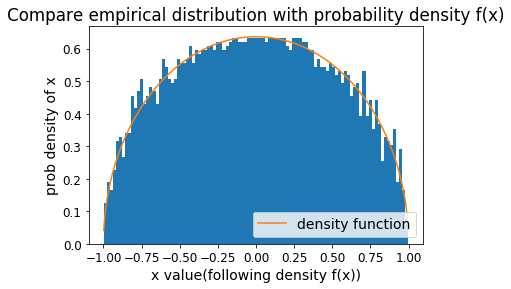

In [146]:
c = 4 / math.pi
nr_samples = 10000
uni_sps = np.random.rand(nr_samples) 
xrange = np.linspace(-2, 2, nr_samples)
fxid = c * g(xrange) * uni_sps < f(xrange)
xf = xrange[fxid]
fxf = f(xf)
plt.hist(xf, bins=100, density=1)
plt.plot(xf, fxf, label='density function')
plt.legend(loc='best')
plt.xlabel('x value(following density f(x))')
plt.ylabel('prob density of x')
plt.title('Compare empirical distribution with probability density f(x)')
plt.show()


### Exercise 3 LLN and CLT

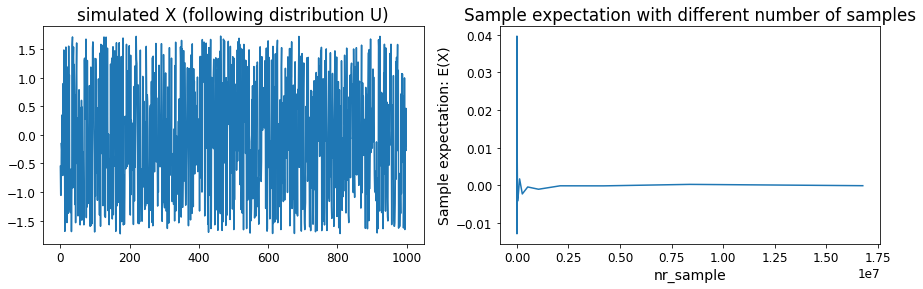

In [222]:
# 1. generate (x1,..., xn) iid copies of X~U(-sqrt(3) ,sqrt(3)) 

def ux(nr_sample): 
    uni_sps = np.random.rand(nr_sample) 
    si = - 3 ** 0.5 + 2 * 3 ** 0.5 * uni_sps
    return si

def EspX(nr_samples):
    exs = np.ones((len(nr_samples),1))
    for i in range(len(nr_samples)): 
        nr_sample = nr_samples[i]
        xi = ux(nr_sample)

        exs[i] =  np.sum(xi)/len(xi)
    return exs    
    
nr_samples = 1000
spX = ux(nr_samples)

# 2. Show E(X) = 0
nr_sps = 2 ** np.arange(10,20, 1)
exs = EspX(nr_sps)

plt.figure(figsize=(15.0, 4.0))
plt.subplot(1, 2, 1)
plt.plot(spX)
plt.title('simulated X (following distribution U)')


plt.subplot(1, 2, 2)
plt.plot(nr_sps, exs)
plt.xlabel('nr_sample')
plt.ylabel('Sample expectation: E(X)')
plt.title('Sample expectation with different number of samples')
plt.show()

$$E(X) =\lim_{n \to \infty} E(\bar{X_n}) = 0$$

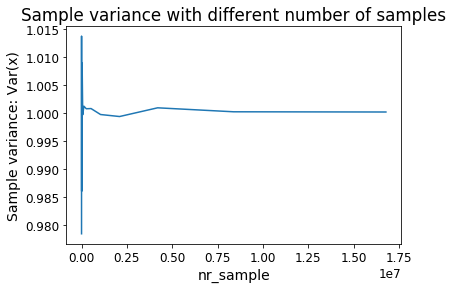

In [226]:
# 3. Show Var(X) = 1
def VarSp(nr_samples): 
    varsps = np.ones((len(nr_samples),1))
    for i in range(len(nr_samples)): 
        nr_sample = nr_samples[i]
        xi = ux(nr_sample)

        exi =  np.sum(xi)/len(xi)
        
        varsps[i] = np.sum((xi - exi) ** 2) / (len(xi) -1)
     
    return varsps

nr_sps = 2 ** np.arange(10,25, 1)
varsps = VarSp(nr_sps) 

plt.plot(nr_sps, varsps)
plt.xlabel('nr_sample')
plt.ylabel('Sample variance: Var(x)')
plt.title('Sample variance with different number of samples')
plt.show()

$$Var(X) = \lim_{n \to \infty} \bar{\sigma_n}^2 = 1$$

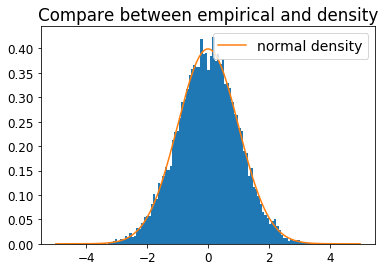

In [244]:
# 4
from scipy.stats import norm
nr_sample = 1000
nrs = 10000
uni_sps = np.random.rand(nr_sample, nrs) 
si = - 3 ** 0.5 + 2 * 3 ** 0.5 * uni_sps

meansi = np.mean(si, axis= 0)
samples = nr_sample ** 0.5 * meansi

xrange = np.linspace(-5, 5, nrs)
noraml_dx = np.exp(- xrange ** 2 /2 ) / (2 * math.pi) ** 0.5

plt.hist(samples, bins=100, density=1)
plt.plot(xrange, noraml_dx, label='normal density')
plt.legend(loc='best')
plt.title('Compare between empirical and density')
plt.show()
